In [106]:
import pandas as pd
housing = pd.read_csv("housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [108]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [109]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


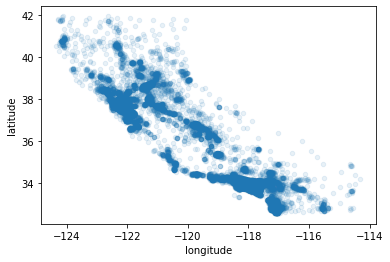

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
housing= pd.read_csv("housing.csv")
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha=0.1)

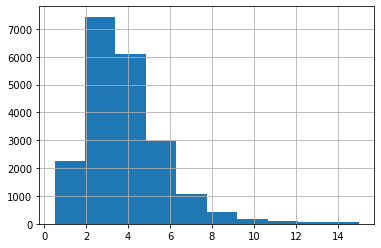

In [111]:
housing["median_income"].hist()

In [112]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<function matplotlib.pyplot.show(*args, **kw)>

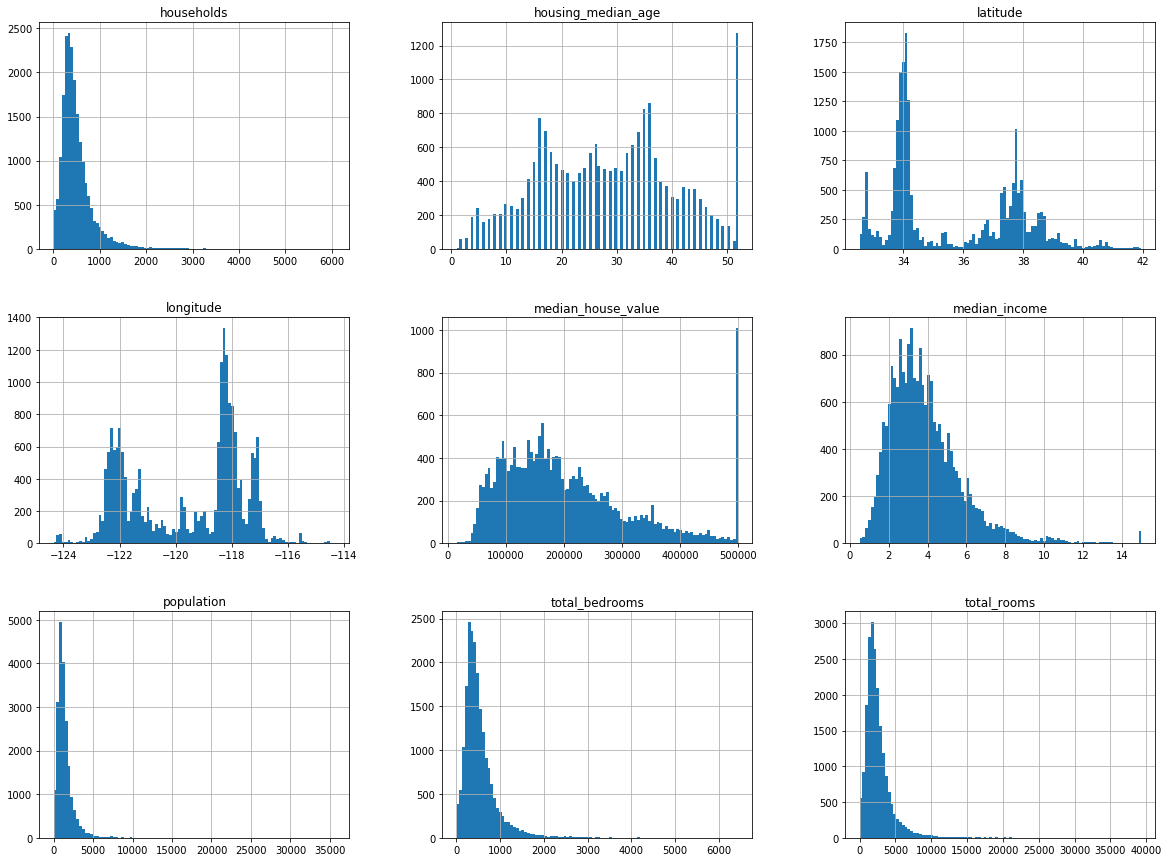

In [113]:
import matplotlib.pyplot as plt
housing.hist(bins =100, figsize=(20,15))
plt.show

In [114]:
import numpy as np
def split_train_test (data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [115]:
    train_set, test_set = split_train_test(housing, 0.2)
    len(train_set)

16512

In [116]:
len(test_set)

4128

In [117]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff<test_ratio*2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids=data[id_column]
    
    in_test_set=ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()
train_set, test_set= split_train_test_by_id(housing_with_id, 0.2,"index")

housing_with_id["id"]= housing["longitude"] * 1000+ housing["latitude"]
ttrain_ser, testser = split_train_test_by_id(housing_with_id, 0.2, "id")

In [118]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size =0.2, random_state=42)

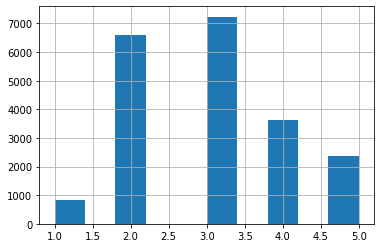

In [119]:
import pandas as pd
import numpy as np
housing["income_cat"]=pd.cut(housing["median_income"],
bins= [0.,1.5,3.0,4.5,6,np.inf],
labels = [1,2,3,4,5])
housing["income_cat"].hist()


In [120]:
from sklearn.model_selection import StratifiedShuffleSplit

In [121]:
split= StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [122]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)


3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [123]:
for set_ in (strat_train_set, strat_test_set):
        set_.drop("income_cat",axis =1, inplace=True)


In [124]:
housing= strat_train_set.copy()

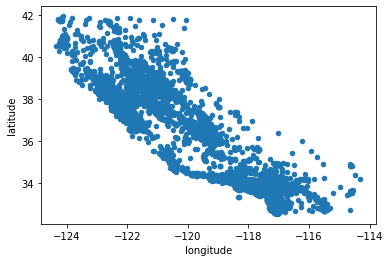

In [125]:
housing.plot(kind = "scatter", x="longitude", y ="latitude") 

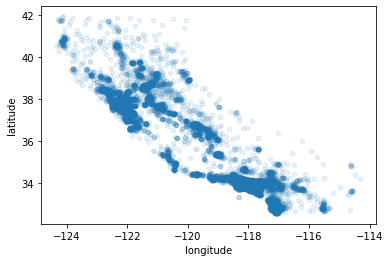

In [126]:
housing.plot(kind = "scatter", x="longitude", y ="latitude", alpha=0.1) 

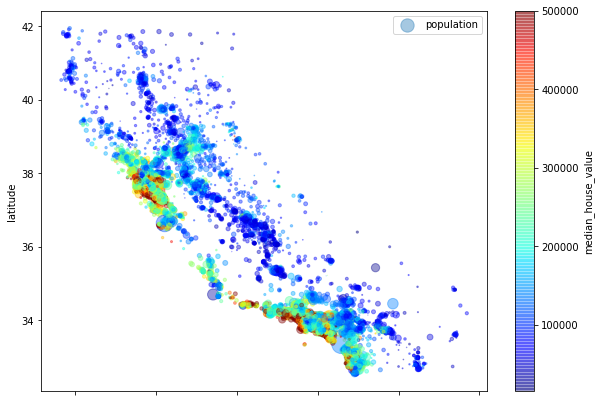

In [127]:
housing.plot(kind = "scatter", x="longitude", y ="latitude", alpha=0.4, 
             s=housing["population"]/100, label="population", figsize=(10,7), 
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar = True,) 
plt.legend()

In [128]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687014
total_rooms           0.139801
housing_median_age    0.098433
households            0.069613
total_bedrooms        0.054374
population           -0.021903
longitude            -0.043442
latitude             -0.144854
Name: median_house_value, dtype: float64

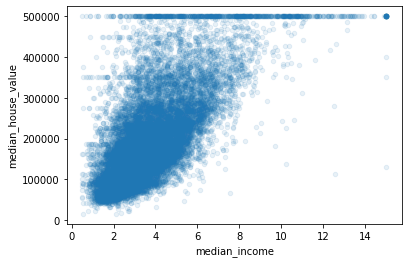

In [129]:
housing.plot(kind = "scatter", x="median_income", y ="median_house_value", alpha=.1) 

In [130]:
housing["rooms_per_household"]= housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]= housing["population"]/housing["households"]

corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687014
rooms_per_household         0.154133
total_rooms                 0.139801
housing_median_age          0.098433
households                  0.069613
total_bedrooms              0.054374
population                 -0.021903
population_per_household   -0.027443
longitude                  -0.043442
latitude                   -0.144854
bedrooms_per_room          -0.256332
Name: median_house_value, dtype: float64

In [131]:
housing=strat_train_set.drop("median_house_value", axis=1)
housing_label = strat_train_set["median_house_value"].copy()

In [132]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")
housing_num=housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2123.5   ,  434.    , 1166.    ,
        409.    ,    3.5341])

In [133]:
housing_num.median().values

array([-118.49  ,   34.26  ,   29.    , 2123.5   ,  434.    , 1166.    ,
        409.    ,    3.5341])

In [134]:
x= imputer.transform(housing_num)

In [135]:
housing_tr=pd.DataFrame(x, columns=housing_num.columns)

In [136]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
5288,<1H OCEAN
12865,INLAND
9174,<1H OCEAN
17247,<1H OCEAN
14138,NEAR OCEAN
5722,<1H OCEAN
18559,NEAR OCEAN
18488,INLAND
9796,NEAR OCEAN
19705,INLAND


In [137]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()

In [138]:
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [4.],
       [0.],
       [4.],
       [1.],
       [4.],
       [1.]])

In [139]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [170]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [167]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [142]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [143]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [144]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [145]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)

In [146]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
some_data = housing.iloc[:5]
some_labels=  housing_label.iloc[:5]
some_data_prepared =  full_pipeline.transform(some_data)
print("predictions:", lin_reg.predict(some_data_prepared))


predictions: [289969.50640516 121237.63448993 221892.1646718  248043.60612292
 181941.24496149]


In [148]:
print("labels", list(some_labels))

labels [500001.0, 114300.0, 228100.0, 293800.0, 116900.0]


In [149]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_label, housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68144.20403630972

In [150]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [151]:
from sklearn.metrics import mean_squared_error
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_label, housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

In [152]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_label,
                       scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores=np.sqrt(-scores)

In [153]:
def display_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

scores: [73373.60937657 71707.79148554 65368.68985779 66196.84405873
 71370.54911743 69785.29371448 67569.5354707  68158.56464171
 66297.92782004 70629.02900466]
mean: 69045.78345476673
standard deviation: 2577.384142350704


In [154]:
from sklearn.model_selection import cross_val_score
lin_scores=cross_val_score(lin_reg, housing_prepared, housing_label,
                          scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)

def display_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("standard deviation:", scores.std())
    
display_scores(lin_rmse_scores)

scores: [66236.07150599 71351.82289977 67726.49972246 67722.85181465
 75025.93826873 69679.28471806 68342.50245934 65409.55141324
 65140.25129467 67647.53570989]
mean: 68428.23098068067
standard deviation: 2828.0362010200256


In [155]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_label)

from sklearn.metrics import mean_squared_error
housing_predictions=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_label, housing_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

C:\Users\Haiyeesha\Documents\conda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


21783.550289356655

In [156]:
from sklearn.model_selection import cross_val_score
forest_scores=cross_val_score(forest_reg, housing_prepared, housing_label,
                          scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)

def display_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("standard deviation:", scores.std())
    

display_scores(forest_rmse_scores)

scores: [51390.73975989 55097.8983969  51396.02899237 50349.02565736
 54296.64211625 52461.96688847 50523.18911664 52539.93336048
 50077.04409912 50896.58152625]
mean: 51902.90499137266
standard deviation: 1607.487602715698


In [157]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
                            return_train_score=True)
grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [158]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [159]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [160]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


64149.16944992698 {'max_features': 2, 'n_estimators': 3}
54767.67286263924 {'max_features': 2, 'n_estimators': 10}
52511.44783337606 {'max_features': 2, 'n_estimators': 30}
60315.300485306645 {'max_features': 4, 'n_estimators': 3}
52065.06466080193 {'max_features': 4, 'n_estimators': 10}
49772.02872581873 {'max_features': 4, 'n_estimators': 30}
58205.67602485219 {'max_features': 6, 'n_estimators': 3}
51720.12927910655 {'max_features': 6, 'n_estimators': 10}
49244.16238388959 {'max_features': 6, 'n_estimators': 30}
58563.89306028095 {'max_features': 8, 'n_estimators': 3}
51812.77686361 {'max_features': 8, 'n_estimators': 10}
49611.07788146443 {'max_features': 8, 'n_estimators': 30}
61477.53136849077 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54321.71677678811 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60243.22308011405 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51641.64070196803 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


In [161]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.11698386e-02, 6.33471273e-02, 4.14903707e-02, 1.78467642e-02,
       1.65910696e-02, 1.70251318e-02, 1.60262593e-02, 3.73754072e-01,
       4.64296762e-02, 1.06275782e-01, 5.63046020e-02, 1.34929981e-02,
       1.51371800e-01, 2.34519348e-04, 3.54256815e-03, 5.09742142e-03])

In [162]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.37375407158612217, 'median_income'),
 (0.15137180009732223, 'INLAND'),
 (0.10627578170467017, 'pop_per_hhold'),
 (0.071169838561588, 'longitude'),
 (0.06334712727016516, 'latitude'),
 (0.05630460196962451, 'bedrooms_per_room'),
 (0.04642967623621912, 'rooms_per_hhold'),
 (0.04149037073770192, 'housing_median_age'),
 (0.017846764190619837, 'total_rooms'),
 (0.01702513176960724, 'population'),
 (0.016591069551702843, 'total_bedrooms'),
 (0.01602625926322746, 'households'),
 (0.013492998140423885, '<1H OCEAN'),
 (0.0050974214218334835, 'NEAR OCEAN'),
 (0.0035425681515091653, 'NEAR BAY'),
 (0.00023451934766279884, 'ISLAND')]

In [163]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [164]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([47841.07196687, 52285.01698338])